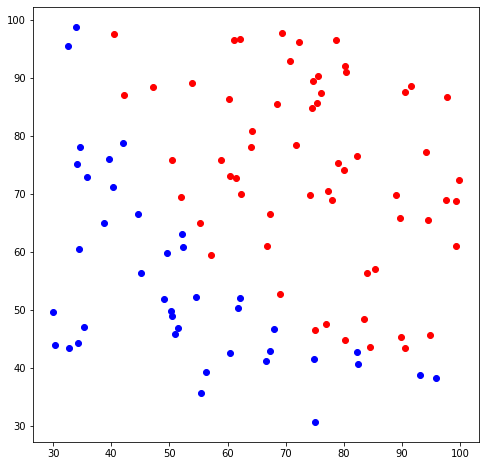

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


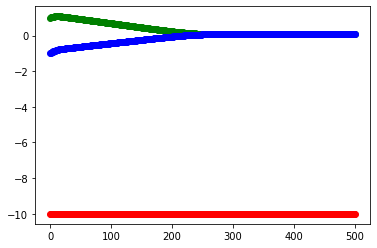

In [126]:
import numpy as np 
from matplotlib import pyplot as plt 
import csv
import copy

#compute z
def compute_z (theta, data):
  z = np.dot(data,np.transpose(theta))
  return z

#compute prediction
def compute_prediction (theta,data):
  z=[]
  for i in range(len(data)):
    z.append(compute_z(theta,data[i]))
  prediction = []
  for i in range(len(z)):
    prediction.append(1.0/(1+np.exp(-z[i])))

  return prediction

# Objective Function
def compute_cost(theta, data, l):
  m = float(len(l))
  prediction = compute_prediction(theta, data)
  prediction=np.array(prediction)
  l=np.array(l)
  
  J = (1/m)*(np.sum(-l*np.log(prediction)-(1-l)*np.log(1-prediction)))
  
  return J
 
# get theta, theta_history, J_history
def compute_theta(theta, data, l, alpha, num):
  m = float(len(data))
  data_x=[]
  data_y=[]

  for i in range(int(m)):
    data_x.append(copy.deepcopy(data[i][1]))
    data_y.append(copy.deepcopy(data[i][2]))
  
  J_history=[]
  theta_history=[]
  J_history.append(compute_cost(theta,data, l))
  theta_history.append(copy.deepcopy(theta))


  for i in range(num):
    prediction = compute_prediction(theta,data)
    prediction = np.array(prediction)
    l = np.array(l)
    loss = prediction - l
   
    t0 = alpha*(1/m)*np.sum(loss)
    t1 = alpha*(1/m)*np.sum(loss*data_x)
    t2= alpha*(1/m)*np.sum(loss*data_y)
    
    theta[0]-=t0
    theta[1]-=t1
    theta[2]-=t2
  
  
    J_history.append(compute_cost(theta, data, l))
    theta_history.append(copy.deepcopy(theta))

  return theta, theta_history, J_history





#데이터 읽어오기
data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]


x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]


train_data=[]
data_label=[]
temp=[]

for i in range(len(x)):
  temp.append(1)
  temp.append(copy.deepcopy(x[i]))
  temp.append(copy.deepcopy(y[i]))
  data_label.append(copy.deepcopy(label[i]))
  train_data.append(copy.deepcopy(temp))
  temp.clear()



#트레이닝 데이터 그래프
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='blue')
plt.scatter(x_label1, y_label1, c='red')
plt.show()


theta = [-10, 1, -1]
alpha = 0.001
num = 500

theta, theta_h, cost_h = compute_theta(theta, train_data, data_label, alpha, num)

temp=[]
temp1=[]
temp2=[]
for i in range(len(theta_h)):
  temp.append(theta_h[i][0])
  temp1.append(theta_h[i][1])
  temp2.append(theta_h[i][2])
#theta graph
plt.scatter(range(num+1), temp, c='red')
plt.scatter(range(num+1), temp1, c='green')
plt.scatter(range(num+1), temp2, c='blue')
plt.show()








In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.txt to data.txt
